# Exercise: computing the distance at which a projectile will hit the ground


In this exercise, you are given three parameters, defining the initial conditions at which a projectile is launched. 
In particular, you are given in input:

- the height $h$ above the ground from which the projectile is launched
- the two components (horizontal $v_x$ and vertical $v_y$) of the velocity, $\vec v = (v_x, v_y)$ at which the projectile is launched

![Simple schematic](./explanation.png)

## Task
**Your task is to write a python function that, given these three parameters, computes the horizontal position $D$ at which the projectile will hit the ground.**

## How to test the results
To test your function, you can move the sliders below that determine the initial conditions of the projectile.

A real-time visualization will show the correct solution for the problem (solid curve), where the launch point is marked by a black dot and the correct hitting point by a black cross.

You will also see the result of your proposed solution as a large red circle. Finally, You can inspect possible errors of your function by opening the tab "Results of the validation of your function".

In [35]:
%matplotlib widget
import numpy as np
import pylab as pl
# import sys

# import tabulate
from ipywidgets import Label, Button, Output, FloatSlider, HBox, VBox, Layout, HTML, Accordion
from widget_code_input import WidgetCodeInput
from scwidgets import (AnswerRegistry, TextareaAnswer, CodeDemo,
                       ParametersBox, PyplotOutput, ClearedOutput,
                       AnimationOutput,CheckRegistry,Answer)
from IPython.display import display

In [36]:
#### AVOID folding of output cell 

In [37]:
%%html
<style>
.jp-CodeCell.jp-mod-outputsScrolled .jp-Cell-outputArea  {  height:auto !important;
    max-height: 5000px; overflow-y: hidden }
</style>
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:4000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

Please enter your name as `SurnameName` to initialize the answer file. 

In [38]:
check_registry = CheckRegistry() 
answer_registry = AnswerRegistry(prefix="projectile-example")
display(answer_registry)

AnswerRegistry(children=(Output(layout=Layout(height='99%', width='99%')), HBox(children=(Dropdown(description…

You can write here general comments you may have on this module. 

In [39]:
example_summary = TextareaAnswer("General comments on this example")
answer_registry.register_answer_widget("example-summary", example_summary)
display(example_summary)

TextareaAnswer(children=(Textarea(value='General comments on this example', layout=Layout(width='99%')), VBox(…

In [40]:
# Value of the vertical (downwards) acceleration
g = 9.81 # m/s^2

In [41]:
code_widget = WidgetCodeInput(
    code_theme='monokai',
    function_name="get_hit_coordinate", 
    function_parameters="vertical_position, horizontal_v, vertical_v, g={}".format(g),
    docstring="""
A function to compute the hit coordinate of a projectile 
on the ground, knowing the initial launch parameters.

:param vertical_position: launch vertical position [m]
:param horizontal_v: launch horizontal position [m/s]
:param vertical_v: launch vertical position [m/s] 
    (positive values means upward velocity)
:param g: the vertical (downwards) acceleration (default: Earth's gravity)
    
:return: the position at which the projectile will hit the ground [m]
""",
    function_body="""
# Input here your solution\n# After changing the function, move one of the sliders to validate your function
import math
return horizontal_v * (vertical_v + math.sqrt(vertical_v**2 + 2. * g * vertical_position)) / g           
    """)
# display(code_widget)



## The solution:
# import math
# return horizontal_v * (vertical_v + math.sqrt(vertical_v**2 + 2. * g * vertical_position)) / g

In [42]:
def trajectory(t, vertical_position, horizontal_v, vertical_v, g):
    """
    Return the coordinates (x, y) at time t
    """
    # We define the initial x coordinate to be zero
    x0 = 0
        
    x = x0 + horizontal_v * t
    y = -0.5 * g* t**2 + vertical_v * t + vertical_position
    
    return x, y    

def hit_conditions(vertical_position, horizontal_v, vertical_v, g):
    """
    Return (t, D), where t is the time at which the ground is hit, and D 
    is the distance at which the projectile hits the ground
    """
    
    # We define the initial x coordinate to be zero
    x0 = 0
    
    # x = x0 + horizontal_v * t => t = (x-x0) / horizontal_v
    # y = -0.5 * g* t**2 + vertical_v * t + vertical_position => 
    #
    # y == 0 => 
    a = -0.5 * g
    b = vertical_v
    c = vertical_position
    
    # the two solutions; I want the solution with positive t, 
    # that will in any case be t1, because
    # t1 > t2 for any value of a, b, c (since a < 0)
    t1 = (-b - np.sqrt(b**2 - 4 * a * c)) / (2. * a)
    #t2 = (-b + np.sqrt(b**2 - 4 * a * c)) / (2. * a)
    
    t = t1
    
    D = x0 + horizontal_v * t
    
    return t, D


In [43]:

def replot(vertical_position, horizontal_v, vertical_v):
    global the_plot, g
    
    # Compute correct values
    t_hit, D = hit_conditions(vertical_position, horizontal_v, vertical_v, g)
    t_array = np.linspace(0,t_hit, 100)
    x_array, y_array = trajectory(t_array, vertical_position, horizontal_v, vertical_v, g)

    # Clean up the graph
    the_plot.axes.clear()
    # Plot orrect curves and points
    the_plot.plot([0], [vertical_position], 'ok')
    the_plot.plot([D], [0], 'xk')    
    the_plot.plot(x_array, y_array, '-b')

    
    ## (Try to) plot user value
    user_value = None
    try:
        user_value = get_user_value()
    except Exception:
        # Just a guard not to break the visualization, we should not end up here
        pass 
    try:
        if user_value is not None:
            the_plot.plot([user_value], [0], 'or')    
    except Exception:
        # We might end up here if the function does not return a float value
        pass 

    the_plot.axhline(0, color='gray')
    # Set zoom to fixed value
    the_plot.set_xlim([-30, 30])
    the_plot.set_ylim([-1, 16])
    
    # Redraw
    the_figure.canvas.draw()
    the_figure.canvas.flush_events()

CodeDemo(children=(HBox(children=(CodeDemoBox(_dom_classes=('scwidget-box', 'scwidget-box--unchecked')), CodeD…

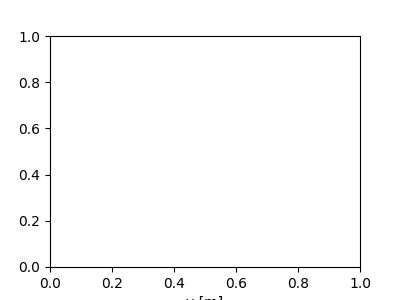

In [44]:
def recompute(e):
    global the_plot, g, traj_parbox
    
    if e is not None:
        if e['type'] != 'change' or e['name'] not in ['value', 'function_body']:
            return     
    replot(traj_parbox.value['vpos'],traj_parbox.value['hvel'], traj_parbox.value['vvel'],
    )
    
    # Print info on the "correctness" of the user's function
#     check_user_value()
    
    
    
plot_box = Output()
display(HBox([plot_box]))    

with plot_box:
    the_figure = pl.figure(figsize=(4,3))
    the_plot = the_figure.add_subplot(1,1,1)
    the_plot.set_xlabel("x [m]")
    the_plot.set_xlabel("y [m]")

traj_parbox = ParametersBox(vpos=(6,0,10,1,r"Vertical position [m]"), hvel=(5,-10,10,1,r"Horizontal velocity [m/s]"), vvel=(3,-10,10,1,r"Vertical velocity [m/s]"))


def ex01_updater(hpos,hvel,vvel,code_input, visualizers):
    d = code_widget.get_function_object()(traj_parbox.value['vpos'],traj_parbox.value['hvel'], traj_parbox.value['vvel'])
    _ = recompute(None)

    if d != None:
        plot_box = visualizers[0]
        _ = recompute(None)


ex01_code_demo = CodeDemo(
            input_parameters_box=traj_parbox,
            code_input= code_widget,
            check_registry=check_registry,
            visualizers = [plot_box],
            update_visualizers = ex01_updater)


# reference displacements for a range of initial parameters
ref_val=[]
ref_dists=[]
test_values_vpos = range(1,7)
test_values_vx = range(-2,3)
test_values_vy = range(-2,3)            
for test_vpos in test_values_vpos:
    for test_vx in test_values_vx:
        for test_vy in test_values_vy:
            correct_value = hit_conditions(vertical_position=test_vpos, 
                horizontal_v=test_vx,
                vertical_v=test_vy,
                g=g
            )[1] # [1] because this gives D ([0] is instead t_hit)
            ref_val.append({'vertical_position':test_vpos,'horizontal_v':test_vx,'vertical_v':test_vy,'g':9.81})
            ref_dists.append(float(correct_value))



check_registry.add_check(ex01_code_demo,
                         inputs_parameters=ref_val,
                         reference_outputs=ref_dists,
                         fingerprint=None,
                         equal = None
                        )



                        
answer_registry.register_answer_widget("ex01-function", ex01_code_demo)
display(ex01_code_demo)


In [45]:
# Perform the first recomputation (to create the plot)

_ = recompute(None)